In [3]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
papers = pd.read_csv('C:\\Users\\Win 1809 UEFI\\Desktop\\000.csv')
# Print head
papers.head()

,review
0,"I travelled Air Arabia from Delhi to Sharjah, ..."
1,Amman to Kuwait. I had a very bad experience w...
2,That was my first experience on Air Arabia. I ...
3,That was my first experience on Air Arabia. I ...
4,"The flight was good, the price of the ticket w..."


In [4]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = papers['review'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head(10)

0    i travelled air arabia from delhi to sharjah a...
1    amman to kuwait i had a very bad experience wi...
2    that was my first experience on air arabia i b...
3    that was my first experience on air arabia i b...
4    the flight was good the price of the ticket wa...
5    it was an afternoon flight which was rather fu...
6    seats very comfortable and the cabin staff gre...
7    very disappointing flight i'm a frequent flyer...
8    birmingham to dubai and i was not that impress...
9    i have a serious phobia of flying i flew emira...
Name: paper_text_processed, dtype: object

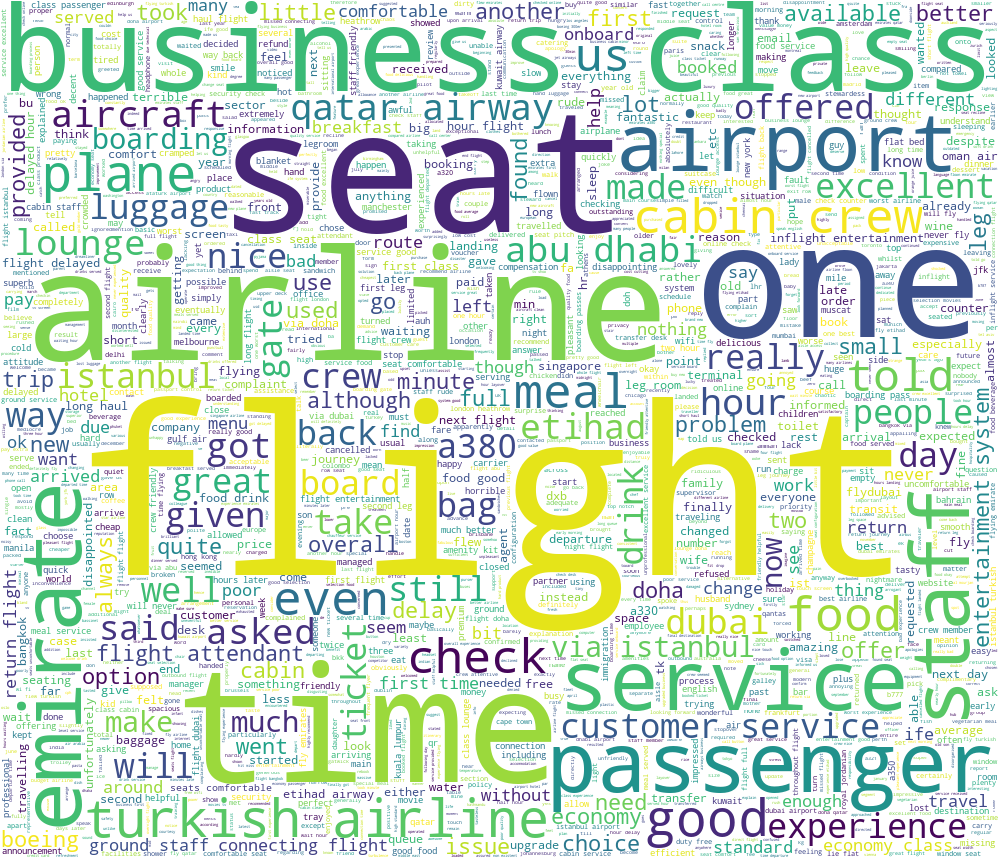

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white",width=1000, height=860, max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

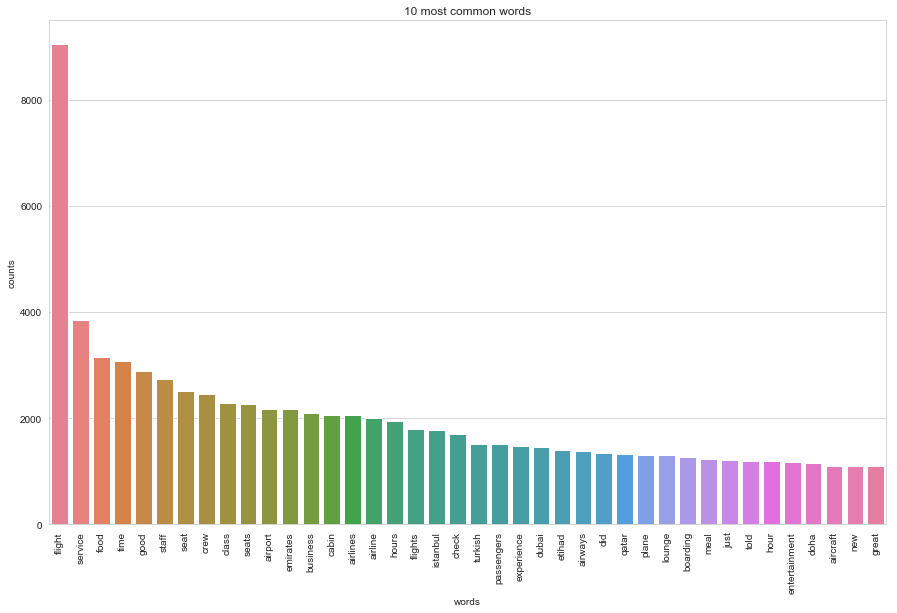

In [6]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['paper_text_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [7]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics =10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
tel aviv series engaged recorded national dushanbe occupied lh increase

Topic #1:
qr doh barcelona par san francisco platinum iad rep rj

Topic #2:
flight hours airport staff time istanbul etihad airline service told

Topic #3:
emirates dubai colombo dxb fi wi gatwick dhaka flight larger

Topic #4:
flight food good service crew seat class cabin time business

Topic #5:
que le il wedding pas les ai et di ci

Topic #6:
version salaam es dar restroom sequence shoulders cologne house 6h

Topic #7:
emirates ticket check flight airline airlines luggage seats pay told

Topic #8:
proceeded tax strict distant goa weigh ta zagreb obtain kolkata

Topic #9:
paulo panama mile copa warn santorini aires buenos strictly kigali
